# Excercise: Phase Behaviour of Reservoir Fluids
NeqSim and HYSYS


In [0]:
#@title Download an install neqsim python package
#@markdown The first step of using neqsim in Colab will be to download the neqsim python package, and install it using pip. The py4j library is neccesary for using the neqsim java library from python.
%%capture
!pip install neqsim==2.5.35

## Excercise 1:
Create a fluid of 90% methane and 10% ethane. Calculate fluid properties at 45 C and 50 bar and print:

* Density
* Enthalpy
* Entropy
* Cp
* Cv
* Speed of sound
* Joule Thomson coefficient
* Viscosity
* Thermal Conductivity

In [2]:
from neqsim.thermo.thermoTools import *

# Creating a fluid in neqsim
fluid1 = fluid("srk") #create a fluid using the SRK-EoS
fluid1.addComponent("methane", 90.0)
fluid1.addComponent("ethane", 10.0)
fluid1.setMixingRule("classic")


fluid1.setTemperature(45.0, "C")
fluid1.setPressure(50.0, "bara")
TPflash(fluid1)
fluid1.initProperties()

print("pressure ", fluid1.getPressure("bara"), " [bara] temperature " , fluid1.getTemperature("C"), " [C]")
print("density ", fluid1.getDensity("kg/m3")," [kg/m3]")
print("enthalpy ", fluid1.getEnthalpy("J/kg")," [J/kg]")
print("entropy ", fluid1.getEntropy("J/kgK")," [J/kgK]")
print("Cp ", fluid1.getCp("J/kgK")," [J/kgK]")
print("Cv ", fluid1.getCv("J/kgK")," [J/kgK]")
#print("speed of sound ", fluid1.getSoundSpeed("m/s")," [m/s]")
#print("Joule Thomson coefficient ", fluid1.getJouleThomsonCoefficient("K/bar")," [K/bar]")
print("Viscosity ", fluid1.getViscosity("kg/msec")," [kg/msec]")
print("Thermal conductivity ", fluid1.getThermalConductivity("W/mK")," [W/mK]")


pressure  50.0  [bara] temperature  45.0  [C]
density  35.7374581103674  [kg/m3]
enthalpy  45724.00166945166  [J/kg]
entropy  -1498.2312073246055  [J/kgK]
Cp  2535.302215823932  [J/kgK]
Cv  1772.321039256026  [J/kgK]
Viscosity  1.2745427046088586e-05  [kg/msec]
Thermal conductivity  0.04103882783027299  [W/mK]


## Excercise 2:
1. See the density of gases example
2. Make a new Colab page and plot the density of pure methane, ethane, propane and CO2 at 25C in the pressure range 1-100 bara
3. Plot the viscosity, thermal conductivity and heat capacity of a 50/50 methane and ethane gas mixture at 25C in the pressure range 1-100 bara
4. Report the gas and liquid phase fractions and gas and liquid composition of a methane (90 mol%) and n-heptane (10 mol%) fluid mixture at 35 C and 60 bara.




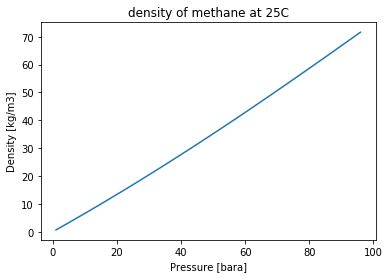

In [3]:
from neqsim.thermo.thermoTools import *
import numpy as np
import matplotlib.pyplot as plt

# Creating a fluid in neqsim
componentName = "methane" #@param ["methane", "ethane", "propane", "CO2"]

fluid1 = fluid("srk") #create a fluid using the SRK-EoS
fluid1.addComponent(componentName, 1.0)
fluid1.setTemperature(25.0, "C")

def realgasdensity(pressure):
    fluid1.setPressure(pressure, "bara")
    TPflash(fluid1)
    fluid1.initProperties();
    return fluid1.getDensity('kg/m3')

pressure = np.arange(1.0, 101.0, 5.0)
realdensity = [realgasdensity(P) for P in pressure]

plt.plot(pressure, realdensity)
plt.title("density of "+componentName + " at 25C")
plt.xlabel('Pressure [bara]')
plt.ylabel('Density [kg/m3]');

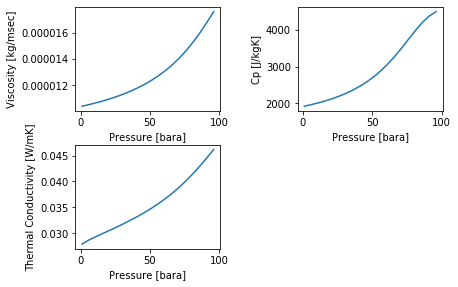

In [4]:
from neqsim.thermo.thermoTools import *
import numpy as np
import matplotlib.pyplot as plt


fluid2 = fluid("srk") #create a fluid using the SRK-EoS
fluid2.addComponent("methane", 50.0)
fluid2.addComponent("ethane", 50.0)
fluid2.setTemperature(25.0, "C")

def fluidproperty(pressure):
    fluid2.setPressure(pressure, "bara")
    TPflash(fluid2)
    fluid2.initProperties();
    return np.array([fluid2.getViscosity("kg/msec"), fluid2.getThermalConductivity("W/mK"),  fluid2.getCp("J/kgK")])

pressure = np.arange(1.0, 101.0, 5.0)
properties = [fluidproperty(P) for P in pressure]

plt.figure()
plt.rcParams['figure.dpi'] = 100
plt.subplot(2, 2, 1)
plt.plot(pressure, np.transpose(properties)[0])
plt.xlabel('Pressure [bara]')
plt.ylabel('Viscosity [kg/msec]');
plt.subplot(2, 2, 2)
plt.plot(pressure, np.transpose(properties)[2])
plt.xlabel('Pressure [bara]')
plt.ylabel('Cp [J/kgK]');
plt.subplot(2, 2, 3)
plt.plot(pressure, np.transpose(properties)[1])
plt.xlabel('Pressure [bara]')
plt.ylabel('Thermal Conductivity [W/mK]');
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.325,
                    wspace=0.535)

In [5]:
from neqsim.thermo.thermoTools import *
import numpy as np
import matplotlib.pyplot as plt


fluid3 = fluid("srk") #create a fluid using the SRK-EoS
fluid3.addComponent("methane", 90.0, "mol/sec")
fluid3.addComponent("n-heptane", 10.0, "mol/sec")
fluid3.setTemperature(35.0, "C")
fluid3.setPressure(60.0, "bara")

TPflash(fluid3)

print("pressure ", fluid3.getPressure("bara"), " [bara] temperature " , fluid3.getTemperature("C"), " [C]")
#print("gas fraction ", fluid3.getPhase("gas").getPhaseFraction(), " [mol/mol]")
#print("oil fraction ", fluid3.getPhase("oil").getPhaseFraction(), " [mol/mol]")
print("methane in gas ", fluid3.getPhase("gas").getComponent("methane").getx(), " [mol/mol]")
print("n-heptane in gas ", fluid3.getPhase("gas").getComponent("n-heptane").getx(), " [mol/mol]")
print("methane in oil ", fluid3.getPhase("oil").getComponent("methane").getx(), " [mol/mol]")
print("n-heptane in oil ", fluid3.getPhase("oil").getComponent("n-heptane").getx(), " [mol/mol]")

pressure  60.0  [bara] temperature  35.0  [C]
methane in gas  0.9940054709037067  [mol/mol]
n-heptane in gas  0.005994529096293198  [mol/mol]
methane in oil  0.2720399764235021  [mol/mol]
n-heptane in oil  0.727960023576498  [mol/mol]


## Excercise 3:
1. See the density of gases example
2. Draw the buble point line of methane
3. Draw the phase envelope of a gas mixture of 90% methane, 5% ethane, 5% propane

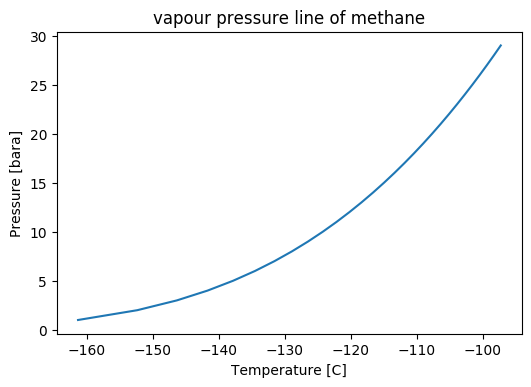

In [6]:
# Creating a fluid in neqsim

fluid4 = fluid("srk") #create a fluid using the SRK-EoS
fluid4.addComponent("methane", 1.0)

def bubleP(pressure):
    fluid4.setPressure(pressure)
    bubt(fluid4)
    return fluid4.getTemperature('C')

pressure = np.arange(1.0, 30.0, 1.0)
temperature = [bubleP(P) for P in pressure]

plt.plot(temperature, pressure);
plt.title("vapour pressure line of methane")
plt.xlabel('Temperature [C]');
plt.ylabel('Pressure [bara]');


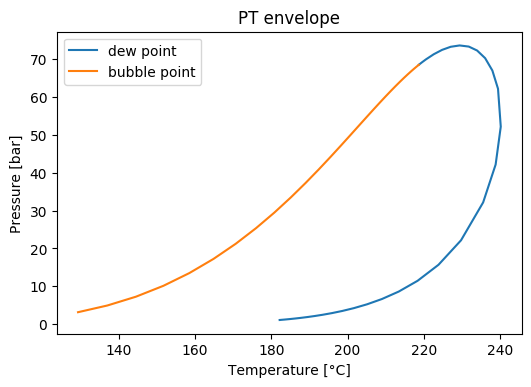

In [7]:
fluid3 = fluid("srk") #create a fluid using the SRK-EoS
fluid3.addComponent("methane", 90.0, "mol/sec")
fluid3.addComponent("ethane", 5.0, "mol/sec")
fluid3.addComponent("propane", 5.0, "mol/sec")

enevlope = phaseenvelope(fluid3)

plt.plot(list(enevlope.getOperation().get("dewT")),list(enevlope.getOperation().get("dewP")), label="dew point")
plt.plot(list(enevlope.getOperation().get("bubT")),list(enevlope.getOperation().get("bubP")), label="bubble point")
plt.title('PT envelope')
plt.xlabel('Temperature [\u00B0C]')
plt.ylabel('Pressure [bar]')
plt.legend()
plt.show()